In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
%matplotlib inline

In [2]:
# create a basic circle
n = 100
m = 150

Z = np.zeros((n, m)).astype('uint8')
for i in range(n):
    for j in range(m):
        if (i-n/2)**2 + (j-m/2)**2 < 20**2:
            Z[i, j] = 1

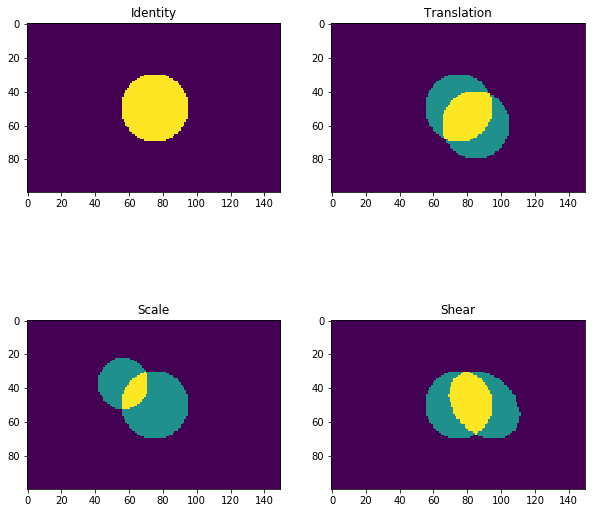

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# identity transform
M = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]).astype('float32').flatten()[:6].reshape((2, 3))
Zt = cv2.warpAffine(Z, M, Z.T.shape)
ax[0, 0].imshow(Z + Zt)
ax[0, 0].set_title('Identity')

# translation
M = np.array([
    [1, 0, 10],
    [0, 1, 10],
    [0, 0, 1]
]).astype('float32').flatten()[:6].reshape((2, 3))
Zt = cv2.warpAffine(Z, M, Z.T.shape)
ax[0, 1].imshow(Z + Zt)
ax[0, 1].set_title('Translation')

# scale
M = np.array([
    [0.75, 0, 0],
    [0, 0.75, 0],
    [0, 0, 1]
]).astype('float32').flatten()[:6].reshape((2, 3))
Zt = cv2.warpAffine(Z, M, Z.T.shape)
ax[1, 0].imshow(Z + Zt)
ax[1, 0].set_title('Scale')

# shear
M = np.array([
    [1, 0.3, 0],
    [0, 1, 0],
    [0, 0, 1]
]).astype('float32').flatten()[:6].reshape((2, 3))
Zt = cv2.warpAffine(Z, M, Z.T.shape)
ax[1, 1].imshow(Z + Zt)
ax[1, 1].set_title('Shear')
plt.show()

In [4]:
# solve for the transformation matrix

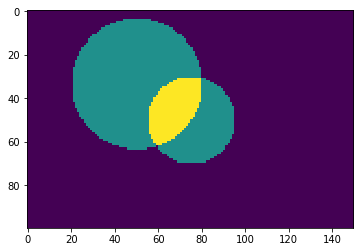

In [5]:
# create a basic circle
Z = np.zeros((n, m)).astype('uint8')
Zt = np.zeros((n, m)).astype('uint8')

for i in range(n):
    for j in range(m):
        if (i-n/2)**2 + (j-m/2)**2 < 20**2:
            Z[i, j] = 1
        if (i-n/3)**2 + (j-m/3)**2 < 30**2:
            Zt[i, j] = 1

plt.imshow(Z + Zt)
plt.show()

In [6]:
M0 = np.r_[1, 0, 0, 0, 1, 1]

def errfun(M, Z, Zt):
    Zw = cv2.warpAffine(Zt, M.reshape((2, 3)).astype('float32'), Zt.T.shape)
    err = ((Z - Zw)**2).sum()
    return err

res = optimize.minimize(lambda x: errfun(x, Z, Zt), M0, method='Powell')
res.x.reshape((2, 3))

/anaconda3/envs/myenv/lib/python3.7/site-packages/scipy/optimize/optimize.py:2365: RuntimeWarning: overflow encountered in ulong_scalars
  tmp2 = (xb - xc) * (fb - fa)
/anaconda3/envs/myenv/lib/python3.7/site-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: overflow encountered in ulong_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/myenv/lib/python3.7/site-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: overflow encountered in ulong_scalars
  tmp1 = (x - w) * (fx - fv)


array([[-42.06824553,   9.05406505,  29.20556835],
       [ 29.20556835,  30.20556835,  30.20556835]])

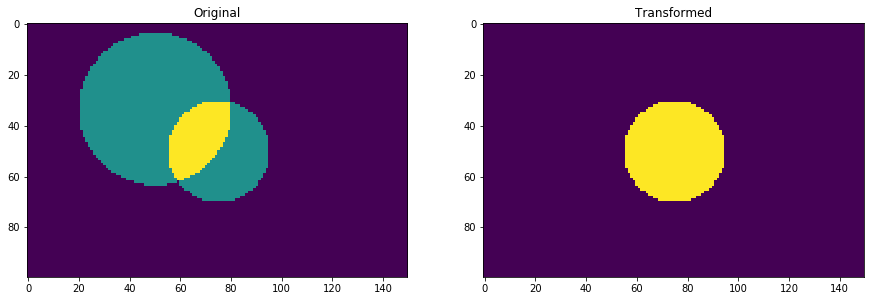

In [7]:
Zw = cv2.warpAffine(Zt, res.x.reshape((2, 3)).astype('float32'), Zt.T.shape)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(Z + Zt)
ax[0].set_title('Original')

ax[1].imshow(Z + Zw)
ax[1].set_title('Transformed')
plt.show()